In [1]:
# This code is developed by Pooyan :D

# Assignment Tittle
__Author__ : Pooyan oskouhi 400222003
__Course__ : Undergraduate Numerical Analysis Course

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sympy as sp

# Problem 1
Assume $ f(x) = x^{1/2}arctan(x) $.Write cubic spline with 11 points in terval [0, 1].

In [2]:
x = sp.symbols('x')
f = sp.sqrt(x) * sp.atan(x)

In [3]:
x_values = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
y_values = [float(f.subs(x, i)) for i in x_values]
y_values

[0.0,
 0.031517995319188724,
 0.08827797805619232,
 0.15963746087367492,
 0.24065336317880726,
 0.32784836840539894,
 0.4186071449027414,
 0.5109700015709241,
 0.6035066456056488,
 0.695209447624046,
 0.7853981633974483]

In [4]:
from typing import Tuple, List
import bisect

In [5]:
def compute_changes(x: List[float]) -> List[float]:
    return [x[i+1] - x[i] for i in range(len(x) - 1)]

In [6]:
def create_tridiagonalmatrix(n: int, h: List[float]) -> Tuple[List[float], List[float], List[float]]:
    A = [h[i] / (h[i] + h[i + 1]) for i in range(n - 2)] + [0]
    B = [2] * n
    C = [0] + [h[i + 1] / (h[i] + h[i + 1]) for i in range(n - 2)]
    return A, B, C

In [8]:
def create_target(n: int, h: List[float], y: List[float]):
    return [0] + [6 * ((y[i + 1] - y[i]) / h[i] - (y[i] - y[i - 1]) / h[i - 1]) / (h[i] + h[i-1]) for i in range(1, n - 1)] + [0]

In [9]:
def solve_tridiagonalsystem(A: List[float], B: List[float], C: List[float], D: List[float]):
    c_p = C + [0]
    d_p = [0] * len(B)
    X = [0] * len(B)

    c_p[0] = C[0] / B[0]
    d_p[0] = D[0] / B[0]
    for i in range(1, len(B)):
        c_p[i] = c_p[i] / (B[i] - c_p[i - 1] * A[i - 1])
        d_p[i] = (D[i] - d_p[i - 1] * A[i - 1]) / (B[i] - c_p[i - 1] * A[i - 1])

    X[-1] = d_p[-1]
    for i in range(len(B) - 2, -1, -1):
        X[i] = d_p[i] - c_p[i] * X[i + 1]

    return X

In [10]:
def compute_spline(x: List[float], y: List[float]):
    n = len(x)
    h = compute_changes(x)

    A, B, C = create_tridiagonalmatrix(n, h)
    D = create_target(n, h, y)

    M = solve_tridiagonalsystem(A, B, C, D)

    alpha = [y[i] for i in range(n)]
    beta = [(y[i+1] - y[i] - (M[i+1]+2*M[i])*h[i]*h[i]/6) for i in range(n - 1)]
    gamma = [M[i]*h[i]*h[i]/2 for i in range(n - 1)]
    delta = [(M[i+1]-M[i])*h[i]*h[i]/6 for i in range(n - 1)]

    return h, alpha, beta, gamma, delta

In [11]:
h, alpha, beta, gamma, delta = compute_spline(x_values, y_values)

In [12]:
s = sp.Piecewise(
    ((((delta[0] * (x - x_values[0]) / h[0]) + gamma[0]) * (x - x_values[0]) / h[0] + beta[0]) * (x - x_values[0]) / h[0] + alpha[0], sp.And(0.0 <= x, x < 0.1)),
    ((((delta[1] * (x - x_values[1]) / h[1]) + gamma[1]) * (x - x_values[1]) / h[1] + beta[1]) * (x - x_values[1]) / h[1] + alpha[1], sp.And(0.1 <= x, x < 0.2)),
    ((((delta[2] * (x - x_values[2]) / h[2]) + gamma[2]) * (x - x_values[2]) / h[2] + beta[2]) * (x - x_values[2]) / h[2] + alpha[2], sp.And(0.2 <= x, x < 0.3)),
    ((((delta[3] * (x - x_values[3]) / h[3]) + gamma[3]) * (x - x_values[3]) / h[3] + beta[3]) * (x - x_values[3]) / h[3] + alpha[3], sp.And(0.3 <= x, x < 0.4)),
    ((((delta[4] * (x - x_values[4]) / h[4]) + gamma[4]) * (x - x_values[4]) / h[4] + beta[4]) * (x - x_values[4]) / h[4] + alpha[4], sp.And(0.4 <= x, x < 0.5)),
    ((((delta[5] * (x - x_values[5]) / h[5]) + gamma[5]) * (x - x_values[5]) / h[5] + beta[5]) * (x - x_values[5]) / h[5] + alpha[5], sp.And(0.5 <= x, x < 0.6)),
    ((((delta[6] * (x - x_values[6]) / h[6]) + gamma[6]) * (x - x_values[6]) / h[6] + beta[6]) * (x - x_values[6]) / h[6] + alpha[6], sp.And(0.6 <= x, x < 0.7)),
    ((((delta[7] * (x - x_values[7]) / h[7]) + gamma[7]) * (x - x_values[7]) / h[7] + beta[7]) * (x - x_values[7]) / h[7] + alpha[7], sp.And(0.7 <= x, x < 0.8)),
    ((((delta[8] * (x - x_values[8]) / h[8]) + gamma[8]) * (x - x_values[8]) / h[8] + beta[8]) * (x - x_values[8]) / h[8] + alpha[8], sp.And(0.8 <= x, x < 0.9)),
    ((((delta[9] * (x - x_values[9]) / h[9]) + gamma[9]) * (x - x_values[9]) / h[9] + beta[9]) * (x - x_values[9]) / h[9] + alpha[9], sp.And(0.9 <= x, x <= 1.0)),
)

In [13]:
x_val = np.linspace(0.0, 1.0, 100)

In [14]:
y_val_f = np.array([float(f.subs(x, i)) for i in x_val])
y_val_s = np.array([float(s.subs(x, i)) for i in x_val])

In [15]:
f_prime = f.diff(x)
s_prime = s.diff(x)
y_val_f_prime = np.array([float(f_prime.subs(x, i)) for i in x_val])
y_val_s_prime = np.array([float(s_prime.subs(x, i)) for i in x_val])

In [16]:
f_zegond = f_prime.diff(x)
s_zegond = s_prime.diff(x)
y_val_f_zegond = np.array([float(f_zegond.subs(x, i)) for i in x_val])
y_val_s_zegond = np.array([float(s_zegond.subs(x, i)) for i in x_val])

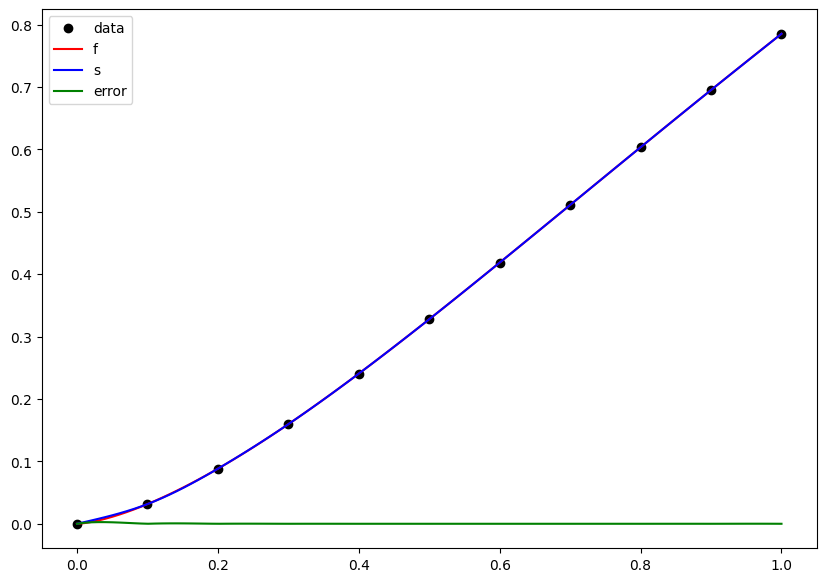

In [17]:
plt.figure(figsize=(10, 7))
plt.plot(x_values, y_values, 'o', color='black',label='data')
plt.plot(x_val, y_val_f, color='red', label='f')
plt.plot(x_val, y_val_s, color='blue', label='s')
plt.plot(x_val, np.abs(y_val_f - y_val_s), color='green', label='error')
plt.legend(loc='best')
plt.show()

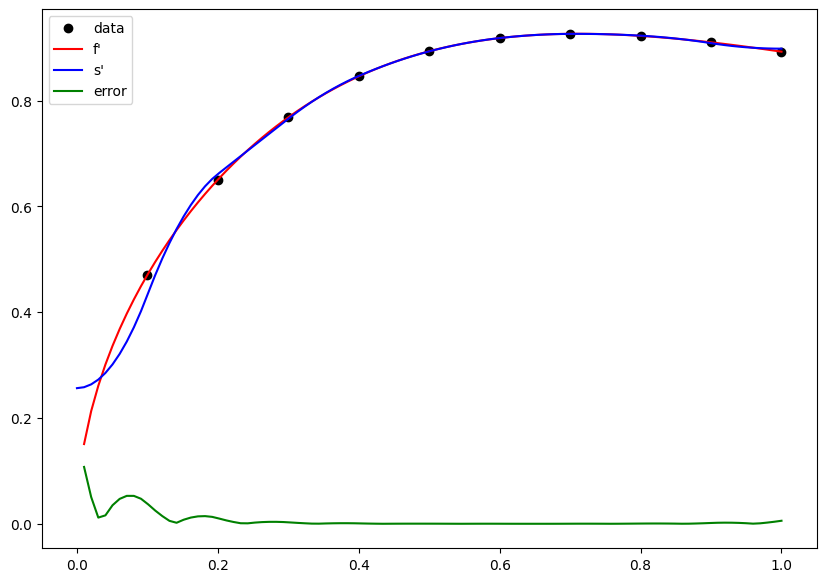

In [18]:
plt.figure(figsize=(10, 7))
plt.plot(x_values, np.array([float(f_prime.subs(x, i)) for i in x_values]), 'o', color='black',label='data')
plt.plot(x_val, y_val_f_prime, color='red', label='f\'')
plt.plot(x_val, y_val_s_prime, color='blue', label='s\'')
plt.plot(x_val, np.abs(y_val_f_prime - y_val_s_prime), color='green', label='error')
plt.legend(loc='best')
plt.show()

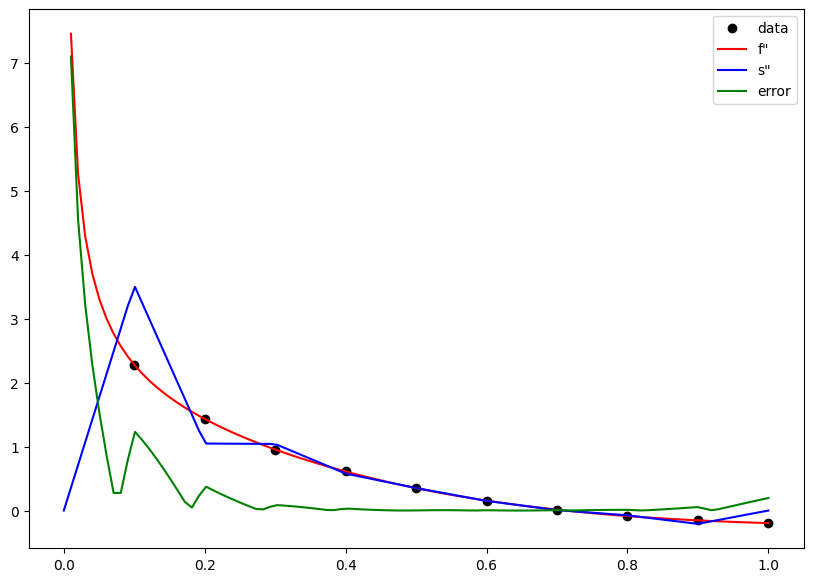

In [19]:
plt.figure(figsize=(10, 7))
plt.plot(x_values, np.array([float(f_zegond.subs(x, i)) for i in x_values]), 'o', color='black',label='data')
plt.plot(x_val, y_val_f_zegond, color='red', label='f\"')
plt.plot(x_val, y_val_s_zegond, color='blue', label='s\"')
plt.plot(x_val, np.abs(y_val_f_zegond - y_val_s_zegond), color='green', label='error')
plt.legend(loc='best')
plt.show()

# Problem 2
